In [76]:
import librosa
import numpy as np
import os
import sys

test_path = os.getcwd().__add__("\\..") + '\\tests\\WAVs (Raw Audio)\\TrumpetEasySolos.mp3'
time_series, sample_rate = librosa.load(test_path)
display(time_series)

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5805224e-20,
       5.9250359e-20, 2.5425729e-20], dtype=float32)

In [77]:
tempo, beat_frames = librosa.beat.beat_track(y=time_series, sr=sample_rate)
tempo, beat_frames
display(time_series)
display(sample_rate)
display(beat_frames)
display(tempo)

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5805224e-20,
       5.9250359e-20, 2.5425729e-20], dtype=float32)

22050

array([   5,   27,   49,   70,   91,  113,  134,  156,  178,  199,  221,
        242,  263,  285,  307,  329,  350,  371,  393,  414,  435,  456,
        477,  498,  519,  541,  563,  585,  607,  629,  650,  673,  695,
        716,  737,  758,  779,  800,  822,  845,  867,  888,  910,  931,
        952,  974,  996, 1017, 1039, 1060, 1082, 1103, 1124, 1147, 1167,
       1189, 1211, 1232, 1253, 1275, 1297, 1319, 1341, 1362, 1383, 1405,
       1426, 1447, 1468, 1490, 1512, 1534, 1556, 1576, 1596, 1617, 1638,
       1661, 1684, 1706, 1728, 1750, 1771, 1792, 1813, 1835, 1857, 1879,
       1900, 1922, 1943, 1964, 1985, 2007, 2029, 2050, 2071, 2094, 2116,
       2137, 2157, 2179, 2201, 2222, 2243, 2265, 2287, 2309, 2331, 2353,
       2374, 2395, 2417, 2438, 2459, 2480, 2501, 2523, 2545, 2567, 2589,
       2611, 2632, 2653, 2675, 2697, 2719, 2740, 2761, 2783, 2804, 2826,
       2848, 2869, 2891, 2913, 2934, 2955, 2976, 2998, 3015, 3038, 3061,
       3084, 3106, 3128, 3149, 3170, 3191, 3213, 32

array([117.45383523])

In [78]:
samples_per_beat = sample_rate * (60 / tempo)
# samples_per_beat = sample_rate * (60 / 120)
samples_per_beat # samples per beat

array([11264.])

In [79]:
seconds_per_beat = samples_per_beat / sample_rate
seconds_per_beat # seconds per beat

array([0.510839])

In [80]:
import IPython

IPython.display.Audio(time_series, rate=sample_rate)

In [81]:
time_series[0]

np.float32(0.0)

In [110]:
from scipy.signal import savgol_filter

y_smooth = savgol_filter(time_series, 20, polyorder=3)

In [132]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

onset_frames = librosa.onset.onset_detect(y=y_smooth, sr=sample_rate)
onset_times = librosa.frames_to_time(onset_frames, sr=sample_rate)
start = onset_times[0]
display(start)
display(start * sample_rate)


search_interval = (start * sample_rate) + [-int(samples_per_beat * 0.05), int(samples_per_beat * 0.05)]
display(search_interval)
sliced_y = time_series[int(search_interval[0]):int(search_interval[1])]

np.float64(0.11609977324263039)

np.float64(2560.0)

C:\Users\xlr9c\AppData\Local\Temp\ipykernel_18244\2703236264.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  search_interval = (start * sample_rate) + [-int(samples_per_beat * 0.05), int(samples_per_beat * 0.05)]


array([1997., 3123.])

In [134]:
dy = np.diff(sliced_y)
display(np.sign(dy))
trough_indices = np.argwhere(np.sign(dy) > 0)
display(trough_indices)

trough_times = librosa.frames_to_time(trough_indices.flatten(), sr=sample_rate)
display(trough_times)

array([-1., -1., -1., ..., -1., -1., -1.], dtype=float32)

array([[  19],
       [  20],
       [  21],
       [  22],
       [  23],
       [  24],
       [  25],
       [  26],
       [  27],
       [  28],
       [  29],
       [  30],
       [  31],
       [  32],
       [  33],
       [  34],
       [  35],
       [  38],
       [  39],
       [  40],
       [  41],
       [  42],
       [  43],
       [  44],
       [  45],
       [  55],
       [  56],
       [  57],
       [  58],
       [  59],
       [  60],
       [  61],
       [  68],
       [  69],
       [  70],
       [  71],
       [  72],
       [  82],
       [  83],
       [  84],
       [ 104],
       [ 105],
       [ 106],
       [ 107],
       [ 108],
       [ 109],
       [ 110],
       [ 111],
       [ 112],
       [ 113],
       [ 114],
       [ 115],
       [ 123],
       [ 124],
       [ 125],
       [ 126],
       [ 127],
       [ 128],
       [ 129],
       [ 130],
       [ 131],
       [ 142],
       [ 143],
       [ 144],
       [ 145],
       [ 146],
       [ 1

array([ 0.44117914,  0.46439909,  0.48761905,  0.510839  ,  0.53405896,
        0.55727891,  0.58049887,  0.60371882,  0.62693878,  0.65015873,
        0.67337868,  0.69659864,  0.71981859,  0.74303855,  0.7662585 ,
        0.78947846,  0.81269841,  0.88235828,  0.90557823,  0.92879819,
        0.95201814,  0.9752381 ,  0.99845805,  1.021678  ,  1.04489796,
        1.27709751,  1.30031746,  1.32353741,  1.34675737,  1.36997732,
        1.39319728,  1.41641723,  1.57895692,  1.60217687,  1.62539683,
        1.64861678,  1.67183673,  1.90403628,  1.92725624,  1.95047619,
        2.41487528,  2.43809524,  2.46131519,  2.48453515,  2.5077551 ,
        2.53097506,  2.55419501,  2.57741497,  2.60063492,  2.62385488,
        2.64707483,  2.67029478,  2.85605442,  2.87927438,  2.90249433,
        2.92571429,  2.94893424,  2.9721542 ,  2.99537415,  3.0185941 ,
        3.04181406,  3.29723356,  3.32045351,  3.34367347,  3.36689342,
        3.39011338,  3.41333333,  3.43655329,  3.45977324,  3.48

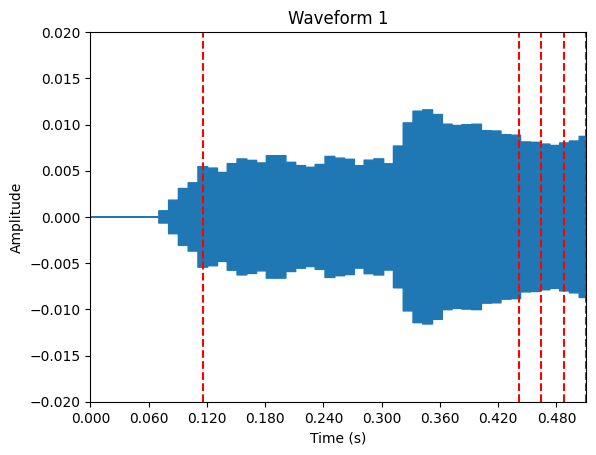

In [135]:
fig, ax = plt.subplots()
librosa.display.waveshow(y_smooth, sr=sample_rate, ax=ax)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform 1')
plt.vlines(np.append(trough_times, start), -0.02, 0.02, color='r', linestyle='dashed')
plt.xlim(0, (60 / tempo))
plt.ylim(-0.02, 0.02)
plt.show()

array([   5,   26,   47,   69,   91,  112,  134,  219,  262,  306,  348,
        392,  434,  477,  519,  542,  563,  607,  714,  729,  736,  758,
        778,  800,  843,  845,  865,  887,  908,  950,  973,  995, 1016,
       1038, 1059, 1080, 1102, 1124, 1146, 1168, 1189, 1211, 1296, 1318,
       1340, 1360, 1382, 1404, 1425, 1446, 1468, 1490, 1512, 1556, 1598,
       1637, 1726, 1770, 1808, 1814, 1832, 1899, 1942, 1960, 1983, 2070,
       2115, 2156, 2244, 2286, 2329, 2416, 2459, 2500, 2588, 2610, 2631,
       2653, 2675, 2685, 2697, 2707, 2719, 2761, 2783, 2793, 2804, 2815,
       2826, 2836, 2848, 2868, 2889, 2933, 2954, 2971, 2997, 3014, 3034,
       3105, 3127, 3143, 3167, 3191, 3277, 3299, 3315, 3342, 3358, 3379,
       3450, 3471, 3488, 3535, 3616, 3644, 3662, 3697, 3709, 3793, 3835,
       3879, 3967, 4009, 4026, 4043, 4068, 4095, 4112, 4130, 4182, 4198,
       4218, 4237, 4312, 4376, 4392, 4419, 4435, 4484, 4504, 4526, 4548,
       4564, 4593, 4607])

np.float64(0.11609977324263039)

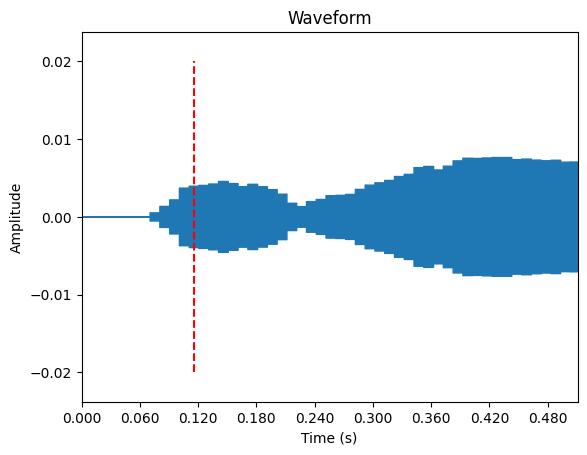

In [94]:
onset_frames = librosa.onset.onset_detect(y=y_smooth, sr=sample_rate)
onset_times = librosa.frames_to_time(onset_frames, sr=sample_rate)
start = onset_times[0]
display(onset_frames)
display(start)

fig, ax = plt.subplots()
librosa.display.waveshow(time_series, sr=sample_rate, ax=ax)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.vlines(start, -0.02, 0.02, color='r', linestyle='dashed')
plt.xlim(0, 60 / tempo)
plt.show()

np.float32(0.0)

array([11264.])

C:\Users\xlr9c\AppData\Local\Temp\ipykernel_18244\359685837.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sliced_series = time_series[int(prev_beat):int(next_beat)]


array([11264.])

array([22528.])

array([22528.])

array([33792.])

array([33792.])

array([45056.])

array([45056.])

array([56320.])

array([56320.])

array([67584.])

array([67584.])

array([78848.])

array([78848.])

array([90112.])

array([90112.])

array([101376.])

array([101376.])

array([112640.])

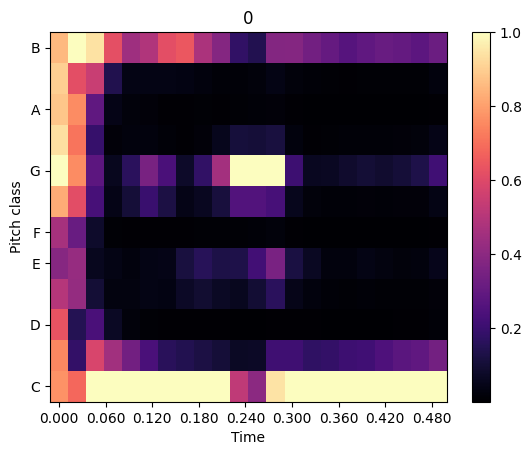

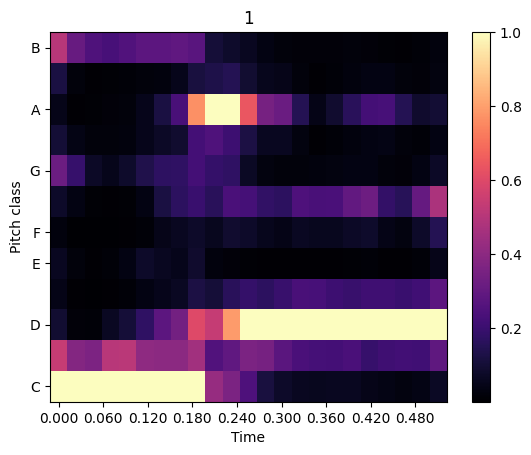

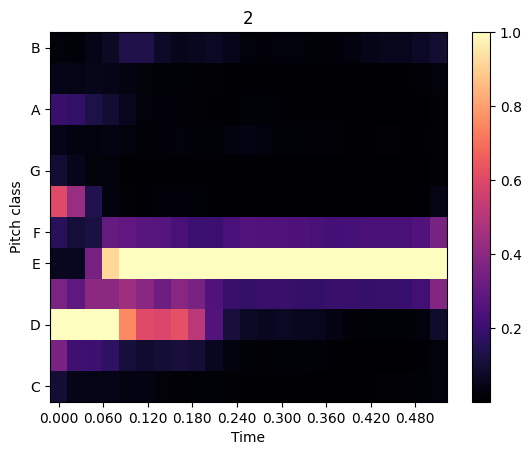

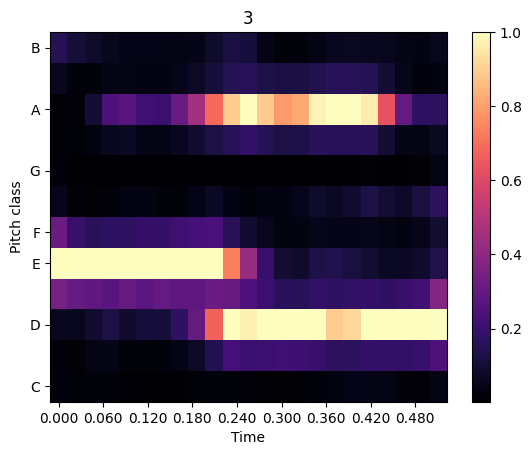

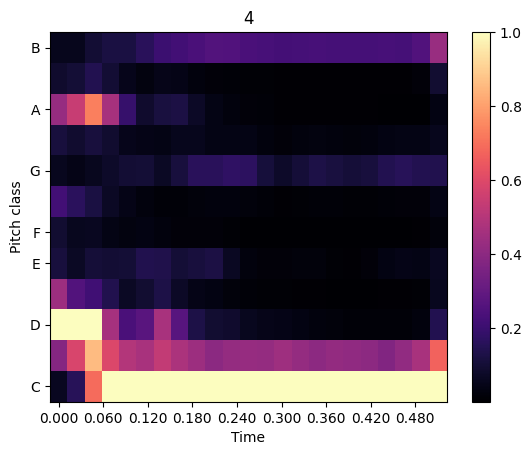

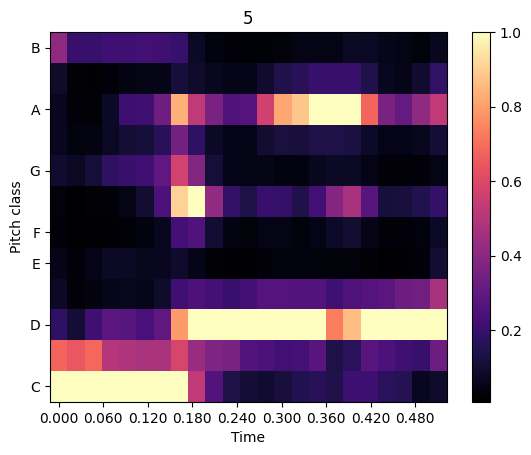

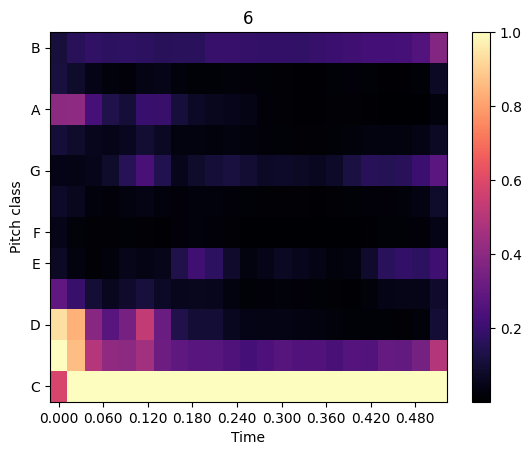

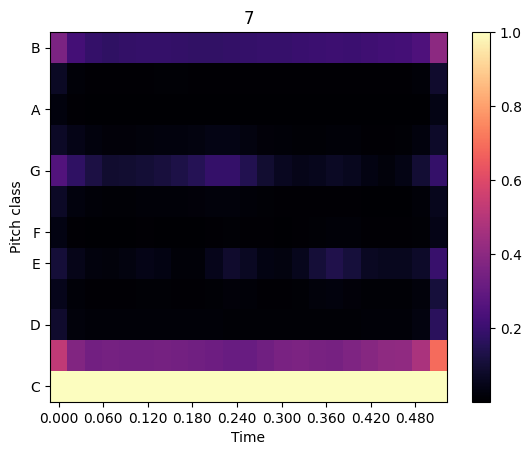

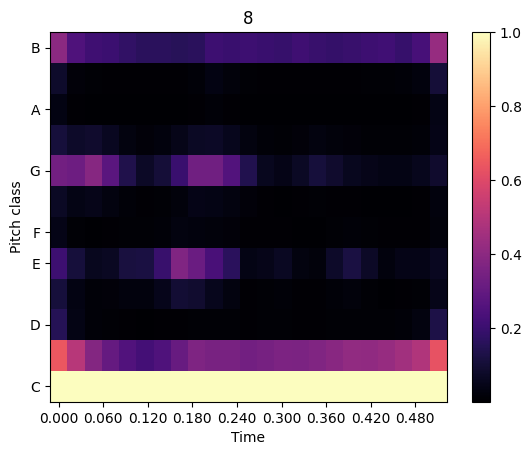

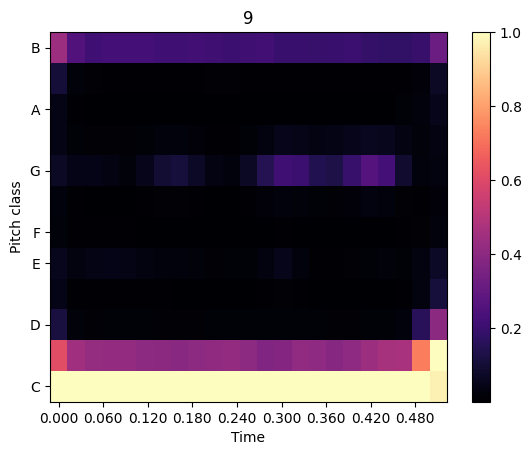

In [85]:
prev_beat = time_series[0]
for i in range(10):
    plt.figure()
    next_beat = prev_beat + samples_per_beat
    display(prev_beat)
    display(next_beat)

    sliced_series = time_series[int(prev_beat):int(next_beat)]

    chroma = librosa.feature.chroma_stft(y=sliced_series, sr=sample_rate)
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.title(i)
    plt.colorbar()

    prev_beat = next_beat